# Part I - (PROSPER LOAN DATA EXPLORATION)
## by (Bruce Mahagwa)

## Introduction
This dataset contains over 80 variables related to loan applications at Prosper Bank. The dataset is particularly useful in exploring the dynamics of loan-borrowing and loan-repayment in financial institutions. Questions such as how likely is it for a loanee to default on his or her loan based on their income-earnings will be interesting to uncover. Other than this, there are many more questions to be asked and insights to be uncovered. 





## Preliminary Wrangling


1. What is the structure of your dataset?
    `It is multivariate timeseries data with 81 variables spread across 113937 columns. 
2. What are the main features of interest in the dataset?
    I am interested in exploring the variables LoanStatus, AmountDelinquent, LoanOriginalAmount, BorrowerAPR and BorrowerRate in relation to other variables. 
3. What features in the dataset do you think will help support your investigation into your features of interest?
    The dataset is almost complete with most variables having the complete range of information needed for the analysis. The dataset is also tidy and no preliminary wrangling is needed.

The first step is to import all the tools needed to carry out initial exploration of the dataset

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Next, the dataset will be loaded and scrutinized to ensure that it is in the right format for analysis

In [2]:
df_prosper_loan = pd.read_csv("prosperLoanData.csv")
df_prosper_loan.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


This succint exploration is intended to highlight variables of interest. 

In [3]:
df_prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

## Univariate Exploration

Let's explore the LoanStatus variable with a simple bar graph. LoanStatus is a categorical variable and will thus be displayed better with a bar graph. It will be important to understand the loan status of loanees at Prosper Bank.

In [4]:
df_prosper_loan["LoanStatus"].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

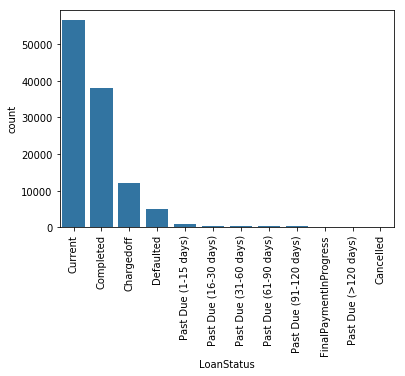

In [5]:
# we use seaborn's countplot function to create a bar chart
classes = ["Current", "Completed", "Chargedoff", "Defaulted", "Past Due (1-15 days)",
"Past Due (16-30 days)", "Past Due (31-60 days)", "Past Due (61-90 days)", "Past Due (91-120 days)",
"FinalPaymentInProgress", "Past Due (>120 days)", "Cancelled"]
def ordered_univariate_bar_chart(category, x):
    lclasses = pd.api.types.CategoricalDtype(ordered = True, categories = category)
    df_prosper_loan_clean = df_prosper_loan.copy()
    df_prosper_loan_clean[x] = df_prosper_loan_clean[x].astype(lclasses)
    base_color = sb.color_palette()[0]
    sb.countplot(data = df_prosper_loan_clean, x = x, color = base_color);
    plt.xticks(rotation = 90)
ordered_univariate_bar_chart(classes, "LoanStatus")
def plot_univariate_bar_chart(x, y):
    base_color = sb.color_palette()[0]
    sb.countplot(data = df_prosper_loan, x = x, color = base_color).set(title = y);
    plt.xticks(rotation = 90);

# plot_univariate_bar_chart("LoanStatus", "Plot of Loan Status")

Most loans owed to Prosper are still being serviced. The next largest group consists of people who have already completed their loans while the smallest group consists of Past Due loans. 

Our next purpose is to determine the distribution of loanees across employment status. In other words, who uses loan services more, the employed or the unemployed?

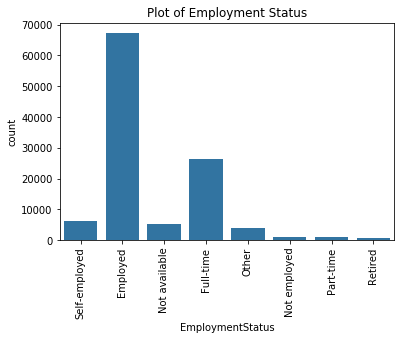

In [6]:
plot_univariate_bar_chart("EmploymentStatus", "Plot of Employment Status")

It seems that the employed are the most likely to apply for a loan at Prosper Bank and the retirees the least likely. 

Next, let's explore how many accounts are considered delinquent.

Text(0.5,0,'Number of Delinquent Accounts')

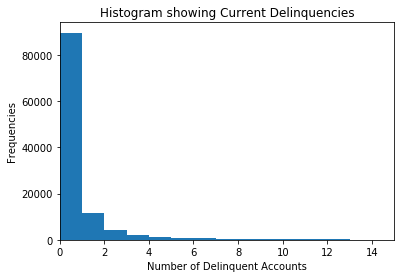

In [7]:
# sorted_counts = df_prosper_loan["CurrentDelinquencies"].value_counts()
# plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, colorbar)
# type_order = df_prosper_loan["CurrentDelinquencies"].value_counts().index
# sb.countplot(data = df_prosper_loan, y = "CurrentDelinquencies", color = base_color, order = type_order)
bins = np.arange(0, df_prosper_loan["CurrentDelinquencies"].max() + 1, 1)

# df_prosper_loan["CurrentDelinquencies"].info()
chosen_columns = df_prosper_loan[["CurrentDelinquencies"]];
df_clean = chosen_columns.copy()
df_clean.dropna(inplace = True)
# df_clean.info()
plt.xlim(0, 15)
plt.hist(data = df_clean, x = "CurrentDelinquencies", bins = bins);
plt.title("Histogram showing Current Delinquencies")
plt.ylabel("Frequencies")
plt.xlabel("Number of Delinquent Accounts")

The figure above shows that most accounts are not delinquent. This proves that the bank is good at managing their credit facilities.

Let's also investigate the income range of customers at Prosper Bank. This information will be useful later when comparing income range to amount borrowed. We will use a bar chart.

In [8]:
df_prosper_loan["IncomeRange"].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

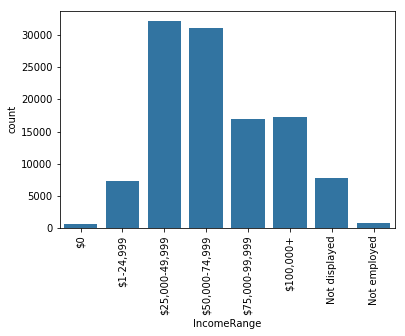

In [9]:
# plot_univariate_bar_chart("IncomeRange", "Plot of Income Range")
classes_1 = ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999",
"$75,000-99,999", "$100,000+", "Not displayed", "Not employed"]
ordered_univariate_bar_chart(classes_1, "IncomeRange")

The plot shows that most people who take loans at Prosper Bank have an income within the range of 25 and 50 thousand dollars. Interestingly, some people who have no income also took loans at the bank. 

Let's figure out how many homeowners took loans from the bank

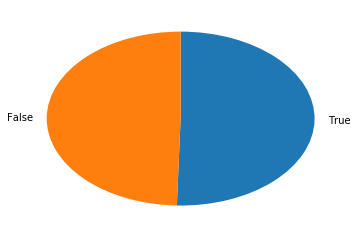

In [10]:
sorted_counts = df_prosper_loan["IsBorrowerHomeowner"].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

Slightly more homeowners opted to take out a loan at Prosper bank.

Let's answer some questions based on the univariate plots above.
1. What is the status of most loans at the bank?
    Most loans are either completed or are currently being serviced.
2. What is the employment status of most loanees?
    Most loanees list themselves as being employed.
3. What is the frequency of delinquency at the bank?
    Most accounts are not delinquent.
4. What is the most common income group seeking loans at the bank?
    $25,000-$49,999 per year

## Bivariate Exploration

This section will focus on bivariate relationships. It will expound more on the variables explored in the immediate previous section.

Let's observe the relationship between Loan Original Amount and the rate of borrowing. Does borrowing rate increase or reduce with higher loan amounts?

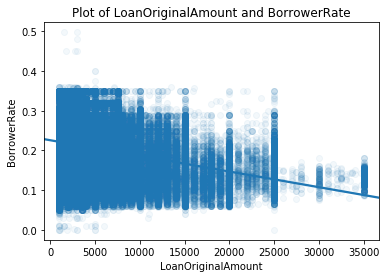

In [11]:
df_clean_new = df_prosper_loan.copy()
def func_scatter(x, y, z):
#     plt.scatter(data = df_clean_new, x = x, y = y);
    sb.regplot(data = z, x = x, y = y, x_jitter = 0.3, scatter_kws={"alpha": 1/20});
    plt.title("Plot of " + x + " and " + y)
func_scatter("LoanOriginalAmount", "BorrowerRate", df_clean_new)

The plot above shows that loan amounts are associated with lower borrower rates and lower loan amounts are associated with higher borrower rates

Next, let's determine the factors that contribute to non-completion of loans. We will explore the relationship between Term and CurrentDelinquencies for accounts with a value of 1 and above. 

Text(0.5,1,'Plot of Term and CurrentDelinquencies')

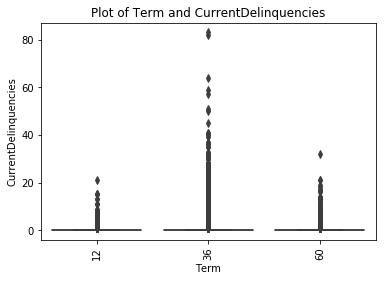

In [12]:
df_explore_new = df_prosper_loan.copy()
df_expore_new = df_explore_new[df_explore_new["CurrentDelinquencies"] > 0]
df_explore_new["Term"] = df_explore_new["Term"].map(str)
term_classes = ["12", "36", "60"]
Vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = term_classes)
df_explore_new["Term"] = df_explore_new["Term"].astype(Vclasses);
sb.boxplot(data = df_explore_new, x = "Term", y = "CurrentDelinquencies");
plt.xticks(rotation = 90)
plt.title("Plot of Term and CurrentDelinquencies")


The scatter plot has a unimodal shape that shows most uncompleted loans have a Term of 36 months.The least amount of delinquent accounts have a loan term of 12 months.

Next, we will analyze the relationship between the cost of repaying the loan and the phenomenon of loan incompleteness. We will use the variables CurrentDelinquencies and BorrowerAPR which is the total annual cost of servicing a loan including interest rates. 

Text(0.5,1,'Plot of CurrentDelinquencies and BorrowerAPR')

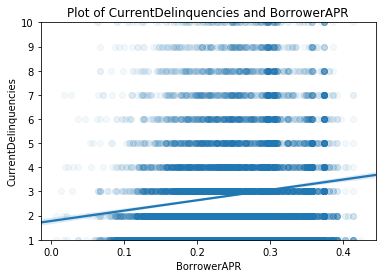

In [13]:
df_clean_new = df_clean_new[df_clean_new["CurrentDelinquencies"] > 0]
sb.regplot(data = df_clean_new, y = "CurrentDelinquencies", x = "BorrowerAPR", scatter_kws={"alpha": 1/20});
plt.ylim(1, 10)
plt.title("Plot of CurrentDelinquencies and BorrowerAPR")

The plot above shows that as BorrowerAPR increases, number of CurrentDelinquencies also increases. 

Next, let's analyze which amounts of money were loaned to Defaulters. Here we will analyze 2  variables: LoanStatus["Defaulted"] and LoanOriginalAmount.

Text(0.5,1,'Plot of LoanOriginalAmount and LoanStatus')

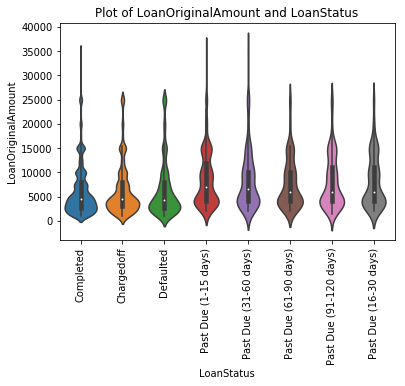

In [14]:
df_explore = df_prosper_loan.copy()
loan_classes = ["Completed", "Chargedoff", "Defaulted", "Past Due (1-15 days)", "Past Due (31-60 days)", "Past Due (61-90 days)", "Past Due (91-120 days)", "Past Due (16-30 days)"]
Lclasses = pd.api.types.CategoricalDtype(ordered = True, categories = loan_classes)
df_explore["LoanStatus"] = df_explore["LoanStatus"].astype(Lclasses);
sb.violinplot(data = df_explore, x = "LoanStatus", y = "LoanOriginalAmount");
plt.xticks(rotation = 90)
plt.title("Plot of LoanOriginalAmount and LoanStatus")

Surprisingly, it is low loan amounts that attract the highest number of defaulters and chargedoffs clients among other categories.

Next, let's investigate which income group has the highest AmountDelinquent.

Text(0.5,1,'Plot of income range and Amount Delinquent')

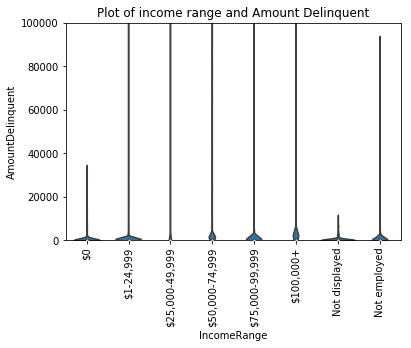

In [15]:
l_classes = ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999",
"$75,000-99,999", "$100,000+", "Not displayed", "Not employed"]
df_clean_new = df_prosper_loan[["IncomeRange", "AmountDelinquent"]].copy()
df_clean_new.dropna(inplace = True)
# cols = df_clean_new["IncomeRange"].unique()
income_classes = pd.api.types.CategoricalDtype(ordered = True, categories = l_classes)
df_clean_new["IncomeRange"] = df_clean_new["IncomeRange"].astype(income_classes);
base_color = sb.color_palette()[0]
sb.violinplot(data = df_clean_new, x = "IncomeRange", y = "AmountDelinquent", color = base_color);
plt.ylim(0, 100000)
plt.xticks(rotation = 90)
plt.title("Plot of income range and Amount Delinquent")

It is not clear how amount delinquent correlates with the income range. However, it is evident that most loanees are delinquent on amounts below "$10,000" while a few have higher delinquent amounts. Also, loannees under the income groups "Not displayed", "$0", and "Not employed" are delinquent on lower amounts compared to other income groups.

Next, let's investigate the relationship between number of months in employment against Debt to Income Ratio. In other words, do people who have worked for longer periods have higher debts?

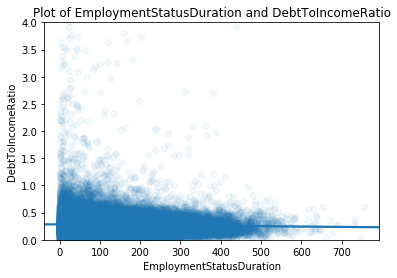

In [16]:
df_clean_new_2 = df_prosper_loan[["DebtToIncomeRatio", "EmploymentStatusDuration"]].copy()
df_clean_new_2.dropna(inplace = True)
func_scatter("EmploymentStatusDuration", "DebtToIncomeRatio", df_clean_new_2)
plt.ylim(0, 4);

It seems that there is no significant correlation between the debt to income ration of a person and how long that individual has had gainful employment.

Let's determine the relationship between LenderYield and Term.

Text(0.5,1,'Plot of Term and LenderYield')

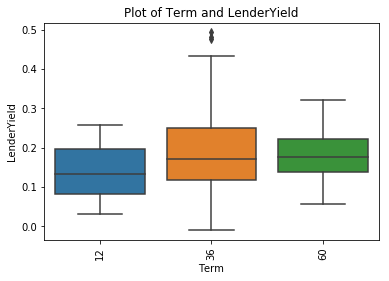

In [17]:
df_clean_new_3 = df_prosper_loan.copy()
df_clean_new_3["Term"] = df_clean_new_3["Term"].map(str)
term_classes = ["12", "36", "60"]
Vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = term_classes)
df_clean_new_3["Term"] = df_clean_new_3["Term"].astype(Vclasses);
sb.boxplot(data = df_clean_new_3, x = "Term", y = "LenderYield");
plt.xticks(rotation = 90)
plt.title("Plot of Term and LenderYield")

It seems that there is no obvious relationship between Term and LenderYield. Thus, the bank does not earn more money if the loan has a longer term.

Is there a relationship between being a home owner and the loan amount one takes out? Let's find out?

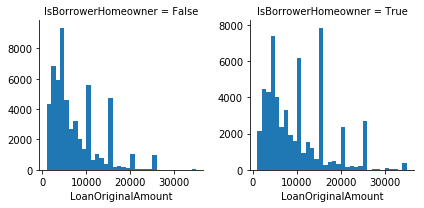

In [18]:
bins = np.arange(1000, 36000, 1000)
g = sb.FacetGrid(data = df_prosper_loan, col = "IsBorrowerHomeowner", sharey = False, size = 3)
g.map(plt.hist, "LoanOriginalAmount", bins = bins);


It seems that there is no real obvious difference between loans incurred by HomeOwners and Non-HomeOwners.

Let's answer some questions based on the bivariate plots.
1. What is the relationship between loanOriginalAmount and Borrower Rate?
    There is a negative relationship between the two variables.
2. What is the relationship between BorrowerAPR and CurrentDelinquencies?
    As BorrowerAPR increases, the number of delinquent accounts increase per client.
3. What is the distribution of loan amounts among different loanstatus groups?
    Most people borrow loan amounts of less than $5,000.

## Multivariate Exploration

In this section, we will use multivariate plots to discover even more insights.

The first thing to uncover is how Term, BorrowerAPR, and Income Rage correlate.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


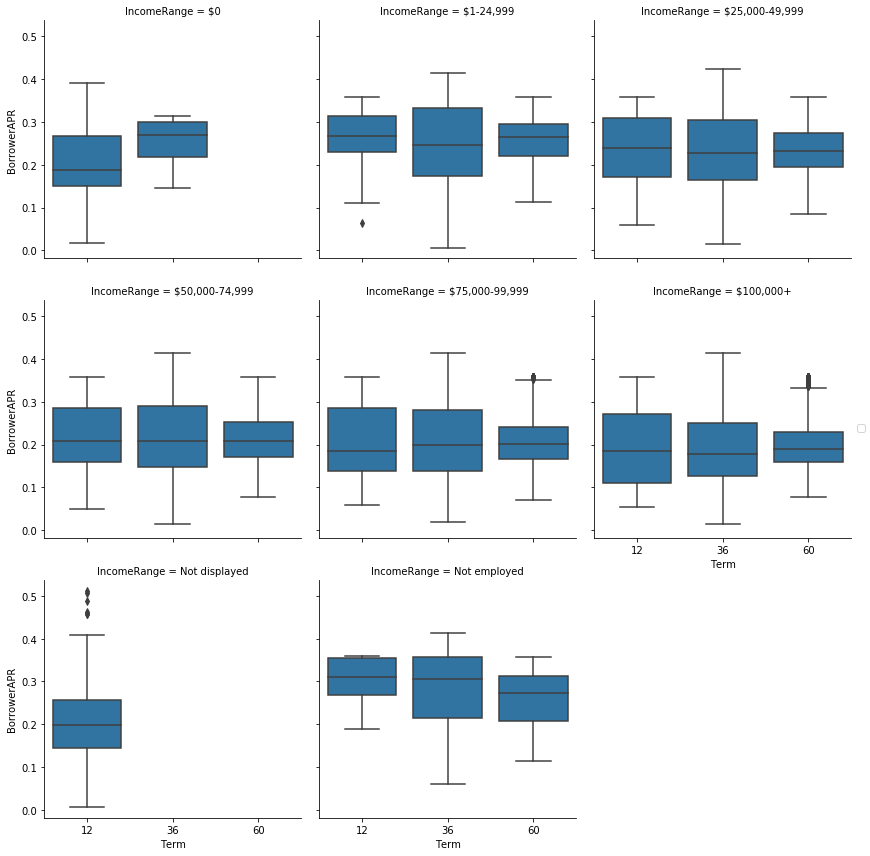

In [19]:
df_clean_3 = df_prosper_loan[["Term", "BorrowerAPR", "IncomeRange"]].copy()
df_clean_3.dropna(inplace = True)
# df_clean_3 = df_clean_3[df_clean_3["IncomeRange"] != "$0"]
# df_clean_3 = df_clean_3[df_clean_3["IncomeRange"] != "Not displayed"]
classes_l = ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999",
"$75,000-99,999", "$100,000+", "Not displayed", "Not employed"]
income_classes = pd.api.types.CategoricalDtype(ordered = True, categories = l_classes)
df_clean_3["IncomeRange"] = df_clean_3["IncomeRange"].astype(income_classes);
def plot_multivariate(data, col, x, y, size):
    g = sb.FacetGrid(data = data, col = col, size = size, palette = "colorblind", col_wrap = 3)
#     g.map(plt.scatter, x, y);
    g.map(sb.boxplot, x, y)
    g.add_legend()
#     plt.title("Plot of " + x + ", " + y + ",  and " + col)
plot_multivariate(df_clean_3, "IncomeRange", "Term", "BorrowerAPR", 4)

There is no obvious relationship between Term and BorrowerAPR. It seems that most people incur loans for 36-month periods as compared to other payment plans.

Next, what is the relationship among the variables Employment Status, Employment Status Duration, and Loan Original Amount.

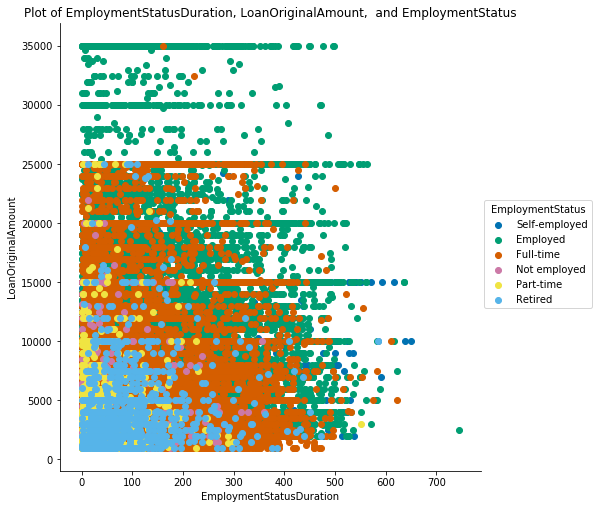

In [20]:
def plot_multivariate(data, hue, x, y, size):
    g = sb.FacetGrid(data = data, hue = hue, size = size, palette = "colorblind")
    g.map(plt.scatter, x, y);
    g.add_legend()
    plt.title("Plot of " + x + ", " + y + ",  and " + hue)
df_clean_4 = df_prosper_loan[["EmploymentStatus", "EmploymentStatusDuration", "LoanOriginalAmount"]].copy()
df_clean_4.dropna(inplace = True);
df_clean_4 = df_clean_4[df_clean_4["EmploymentStatus"] != "Other"]
df_clean_4 = df_clean_4[df_clean_4["EmploymentStatus"] != "Not available"]
df_clean_4["EmploymentStatus"].value_counts()
plot_multivariate(df_clean_4, "EmploymentStatus", "EmploymentStatusDuration", "LoanOriginalAmount", 7)

Retired people are more conservative in the loan amounts they incur whereas the employed are more inclined to take higher loan amounts. Part-time workers also take low loan amounts while full-time workers are more evenly spaced across the spectrum of loan amounts. 

Next, let's try to undertand the relationship between BorrowerRate, AmountDelinquent, and IncomeRange.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


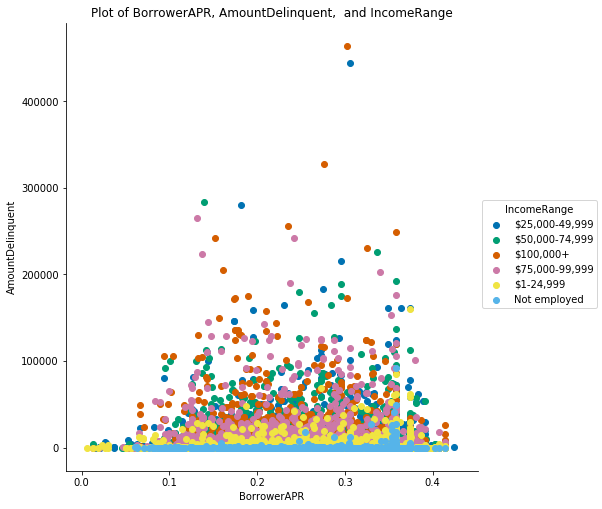

In [21]:
df_clean_5 = df_prosper_loan[["BorrowerAPR", "AmountDelinquent", "IncomeRange"]]
df_clean_5.dropna(inplace = True)
df_clean_5 = df_clean_5[df_clean_5["IncomeRange"] != "$0"]
df_clean_5 = df_clean_5[df_clean_5["IncomeRange"] != "Not displayed"]
plot_multivariate(df_clean_5, "IncomeRange", "BorrowerAPR", "AmountDelinquent", 7)

There is no obvious trend between BorrowerAPR and Amount Delinquent. It seems that the retired income group has the least amount of money delinquent whereas the higher amounts are distributed more or less evenly across the other income groups. However, it seems that the "$75,000 - 99,000" income group is more evenly distributed across the board.

For better clarity, let's use a FacetGrid to display the variables AMount Delinquent and Income Group.

(0, 200000)

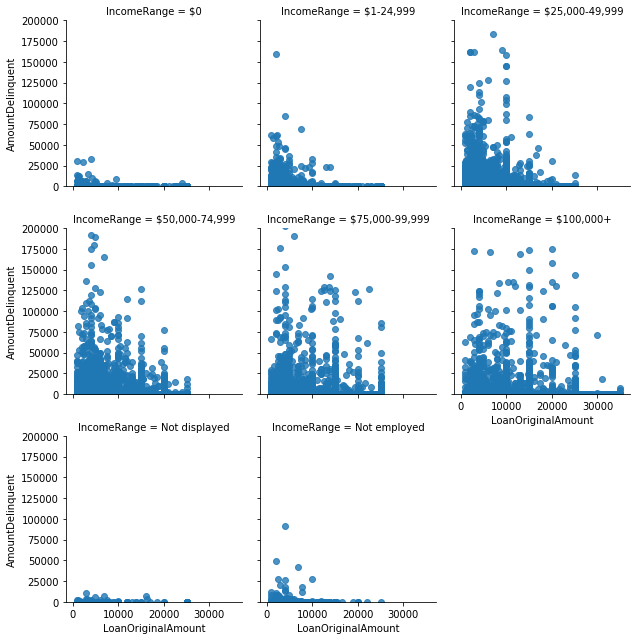

In [22]:
classes_l = ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999",
"$75,000-99,999", "$100,000+", "Not displayed", "Not employed"]
income_classes = pd.api.types.CategoricalDtype(ordered = True, categories = l_classes)
df_clean_3 = df_prosper_loan.copy()
df_clean_3["IncomeRange"] = df_clean_3["IncomeRange"].astype(income_classes);
g = sb.FacetGrid(data = df_clean_3, col = "IncomeRange", margin_titles = True, col_wrap = 3);
g.map(sb.regplot, "LoanOriginalAmount", "AmountDelinquent", fit_reg = False, x_jitter = 0.5);
plt.ylim(0, 200000)

The income group "Not displayed" have the lowest delinquent amount wheras the groups with higher incomes such as the "$100,000+" group have the highest delinquent amount.

Let's answer some questions based on the multivariate plots.
1. What is the relationship between LoanOriginalAmount and EmploymentStatusDuration across different loanStatus groups?
    The self-employed seem to have the highest EmploymentStatusDuration and they also have the highest LoanOriginalAmounts. Fulltime employees have the second highest EmploymentStatusDuration and the second highest LoanOriginalAmounts. 
2. Which income group hashe lowest AmountDelinquent? Surprisingly, we find that the income group under the "Not displayed" category has the lowers AmountDelinquent while the income group "$100,000+" has the highest amounts delinquent.

## Conclusions



The analysis successfully investigated 16 variables to uncover insights using univariate, bivariate, and multivariate plots. The following are some key findings from each section of the analysis.
### Univariate
1. Most accounts are either currently active or already completed. However, there is also a significant number of accounts are chargedoff or defaulted.
2. Most accounts are owned by people who are employed. The retirees have the smallest share of accounts. 
3. Most accounts have zero delinquencies.
### Bivariate
1. As Principal Borrowed increases, Borrower Rate decreases.
2. There are more delinquencies in the 36-month Term than any other Term.
3. As Borrower Rate increases, current delinquencies also increase.
4. Most loan accounts have a loan amount of less than 10,000 dollars.
5. Most accounts that are delinquent are delinquent on amounts below 10,000 dollars. 
6. There is no obvious relationship between Debt to income ration and employment duration.
7. As Term increases, Lender Yield does NOT increase.
### Multivariate
1. The unemployed have the highest BorrowerAPR rate.
2. Retirees spend the least amount of time paying loans.
3. The employed borrow the most amount of money.
4. The employed take the longest amount of time to pay.
5. Individuals under the "Not displayed" income group have the lowest amount delinquent.
6. Individuals under the "$100000" income class have one of the highest amounts delinquent.